<a href="https://colab.research.google.com/github/MatheusSC017/BostonHousingDataRegression/blob/main/BostonHousingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Data Regression

## Libraries

In [ ]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as  sbn
import numpy as np
import pandas as pd

## Dataset Import

In [ ]:
boston_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['Prices'] = boston_data.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Data Clean


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Prices   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Data Normalization

In [ ]:
qt = QuantileTransformer()
boston_data_normalized = qt.fit_transform(boston_df.drop('Prices', axis=1), 
                                          boston_df['Prices'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [ ]:
boston_df_normalized = pd.DataFrame(boston_data_normalized, 
                                    columns=boston_data.feature_names)
boston_df_normalized['Prices'] = boston_data.target
boston_df_normalized

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.000000,0.758416,0.069307,0.0,0.514851,0.730693,0.395050,0.637624,0.000000,0.317822,0.144554,1.000000,0.120792,24.0
1,0.047525,0.000000,0.397030,0.0,0.296040,0.645545,0.512871,0.731683,0.062376,0.109901,0.319802,1.000000,0.370297,21.6
2,0.045545,0.000000,0.397030,0.0,0.296040,0.907921,0.366337,0.731683,0.062376,0.109901,0.319802,0.556436,0.065347,34.7
3,0.065347,0.000000,0.053465,0.0,0.269307,0.873267,0.260396,0.831683,0.123762,0.049505,0.473267,0.649505,0.011881,33.4
4,0.219802,0.000000,0.053465,0.0,0.269307,0.897030,0.320792,0.831683,0.123762,0.049505,0.473267,1.000000,0.145545,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.198020,0.000000,0.586139,0.0,0.592079,0.736634,0.425743,0.366337,0.000000,0.199010,0.937624,0.514851,0.411881,22.4
502,0.126733,0.000000,0.586139,0.0,0.592079,0.425743,0.492079,0.308911,0.000000,0.199010,0.937624,1.000000,0.364356,20.6
503,0.186139,0.000000,0.586139,0.0,0.592079,0.865347,0.680198,0.277228,0.000000,0.199010,0.937624,1.000000,0.162376,23.9
504,0.322772,0.000000,0.586139,0.0,0.592079,0.814851,0.653465,0.336634,0.000000,0.199010,0.937624,0.595050,0.211881,22.0


## Data analysis

### Describe

In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
boston_df_normalized.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.500000,0.229883,0.499630,0.069170,0.500290,0.499988,0.503493,0.499961,0.533012,0.499959,0.499675,0.528412,0.499975,22.532806
std,0.289532,0.385418,0.286686,0.253994,0.290190,0.289519,0.295198,0.289486,0.330961,0.286933,0.286326,0.327046,0.289535,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.250000,0.000000,0.256436,0.000000,0.250495,0.250000,0.250000,0.250000,0.270297,0.248515,0.265347,0.250000,0.250000,17.025000
50%,0.500000,0.000000,0.501980,0.000000,0.514851,0.500495,0.500495,0.500495,0.493069,0.496040,0.506436,0.500000,0.500000,21.200000
75%,0.750000,0.744554,0.756436,0.000000,0.739604,0.750000,0.750743,0.749752,1.000000,0.860396,0.751485,0.749752,0.750000,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


### Data distribution

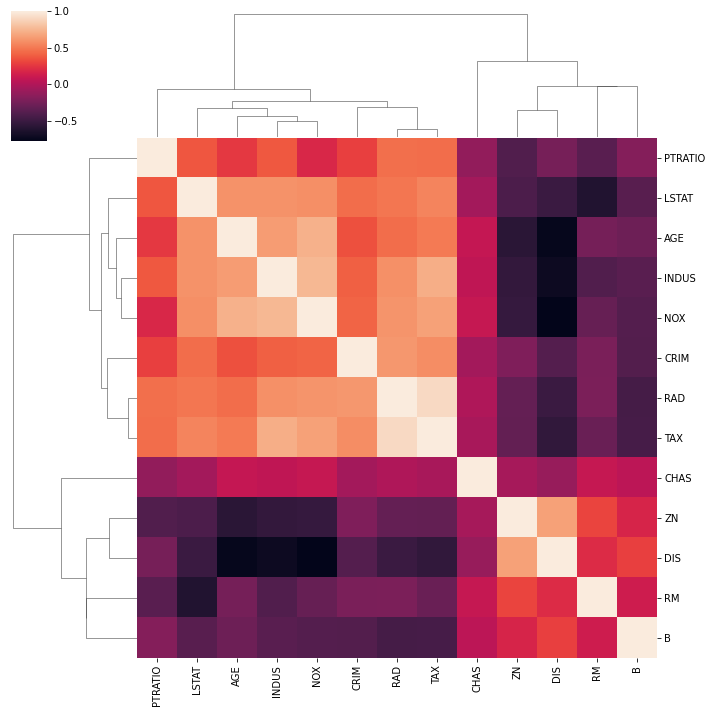

In [ ]:
boston_corr = boston_df.drop('Prices', axis=1).corr()
sbn.clustermap(boston_corr)

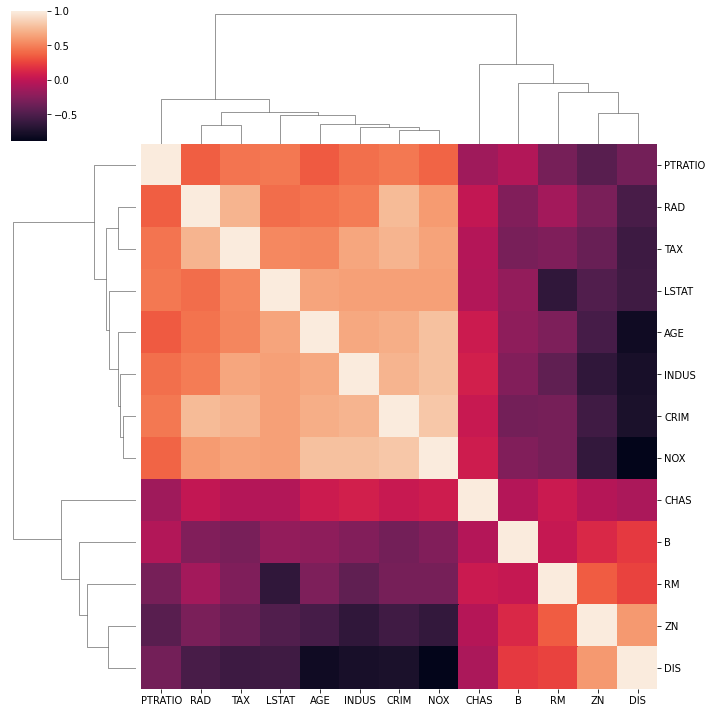

In [ ]:
boston_normalized_corr = boston_df_normalized.drop('Prices', axis=1).corr()
sbn.clustermap(boston_normalized_corr)

### graphical analysis

In [ ]:
def plot_boxplot(figure, column, line, data, column_name):
    figure.add_axes((column, line, 0.6, 0.8))
    plt.ylabel(column_name)
    plt.boxplot(data, widths=0.8)

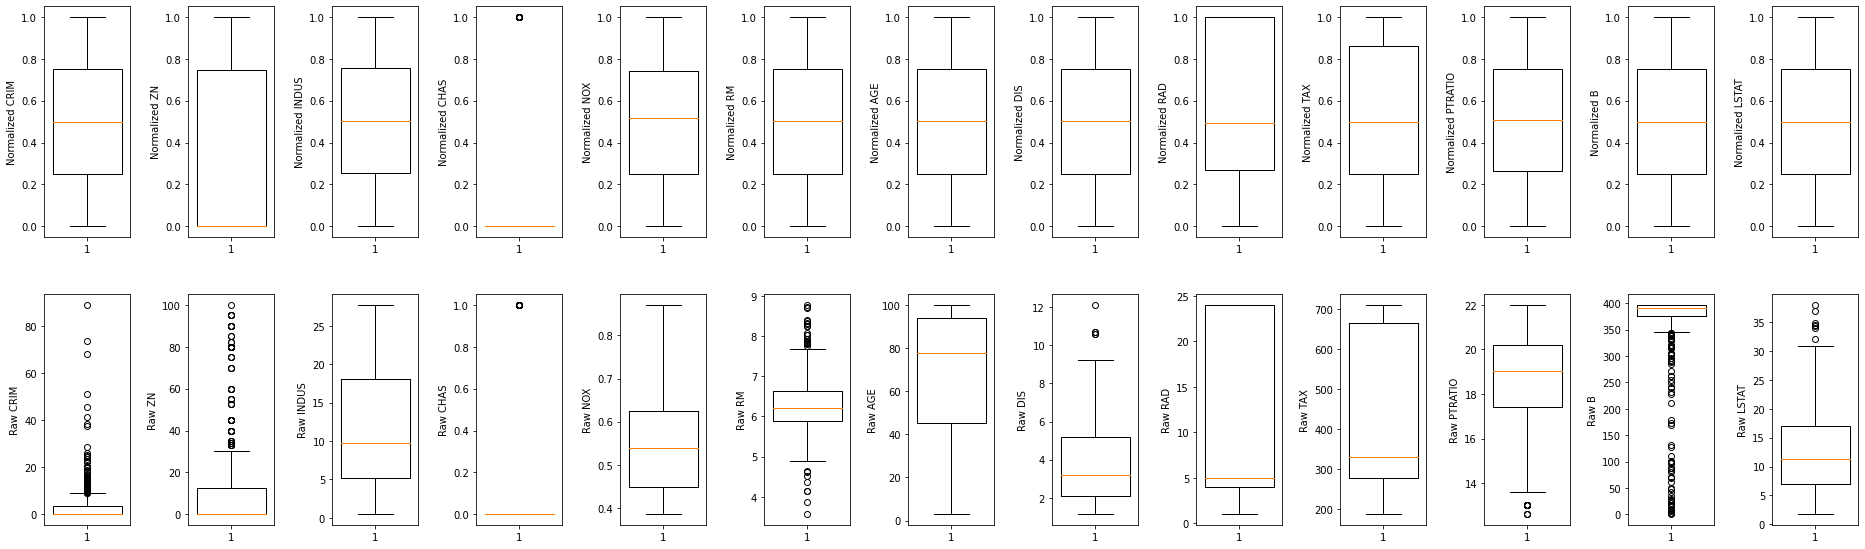

In [ ]:
f = plt.figure(1, figsize=(2, 4))

i = 0
for feature in boston_df.drop('Prices', axis=1):
    plot_boxplot(f, i, 0, boston_df[feature], ('Raw ' + feature))
    plot_boxplot(f, i, 1, boston_df_normalized[feature], 
                 ('Normalized ' + feature))

    i += 1

### Outliers

In [ ]:
def calc_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # interquartile range
    iqr = q3 - q1

    # upper interquartile range
    uiqr = q3 + (iqr * 1.5)
    # lower interquartile range
    liqr = q1 - (iqr * 1.5)

    number_outliers = sum((data <= liqr) | (data >= uiqr))
    perc_outliers = (number_outliers / len(data)) * 100

    return round(perc_outliers, 2)

In [ ]:
outliers_analyse = list()
for feature in boston_df.drop('Prices', axis=1):
    perc_outliers_raw_data = calc_outliers(boston_df[feature])
    perc_outliers_normalized_data = calc_outliers(boston_df_normalized[feature])

    outliers_analyse.append([perc_outliers_raw_data,
                             perc_outliers_normalized_data])

In [ ]:
outliers_analyse = pd.DataFrame(outliers_analyse, 
                                index=boston_data.feature_names,
                                columns=['Raw data %', 'Normalized data %'])
outliers_analyse

,Raw data %,Normalized data %
CRIM,13.04,0.0
ZN,13.44,0.0
INDUS,0.00,0.0
CHAS,100.00,100.0
NOX,0.00,0.0
RM,5.93,0.0
AGE,0.00,0.0
DIS,0.99,0.0
RAD,0.00,0.0
TAX,0.00,0.0


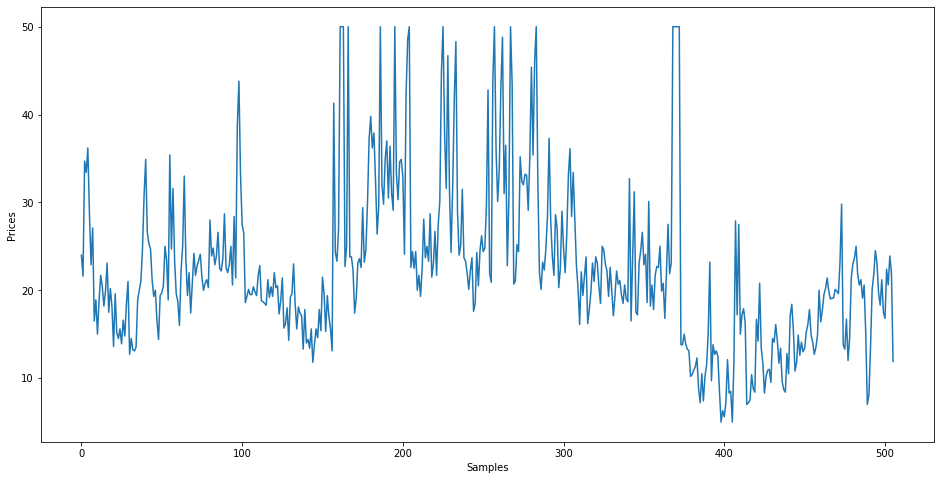

In [ ]:
f = plt.figure(2, figsize=(16, 8))
plt.ylabel('Prices')
plt.xlabel('Samples')
plt.plot(boston_df['Prices'])

## Feature selection

In [ ]:
sfs = SequentialFeatureSelector(GradientBoostingRegressor(),
                                n_features_to_select=5,
                                direction='backward',
                                cv=5)

In [ ]:
sfs.fit(boston_df_normalized.drop('Prices', axis=1), 
        boston_df_normalized['Prices'])

SequentialFeatureSelector(direction='backward',
                          estimator=GradientBoostingRegressor(),
                          n_features_to_select=5)

In [ ]:
sfs.get_feature_names_out()

array(['CRIM', 'NOX', 'RM', 'DIS', 'LSTAT'], dtype=object)

## Parameters selection

## Model Training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    sfs.transform(boston_df_normalized.drop('Prices', axis=1)),
    boston_df_normalized['Prices'], 
    test_size=0.2,
    random_state=701
)

In [ ]:
reg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)

In [ ]:
reg.fit(X_train, Y_train)

GradientBoostingRegressor()

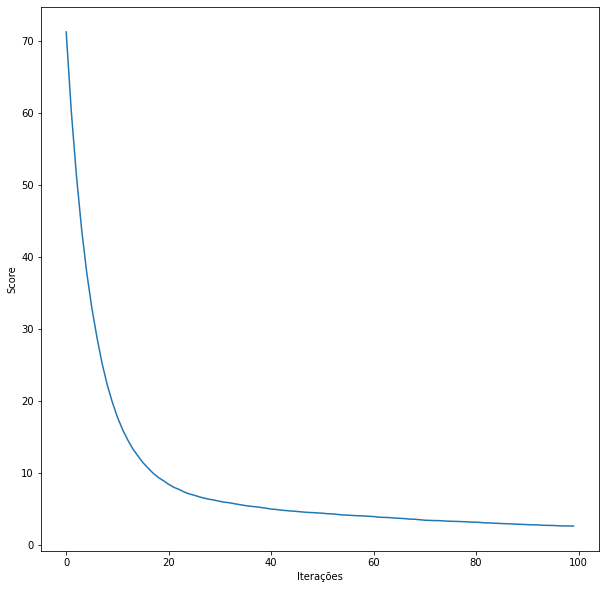

In [ ]:
plt.figure(figsize=(10, 10))
plt.ylabel('Score')
plt.xlabel('Iterações')
plt.plot(reg.train_score_)

In [ ]:
reg.score(X_test, Y_test)

0.90571491293283

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_pred, Y_test)
mse

7.814843910010586

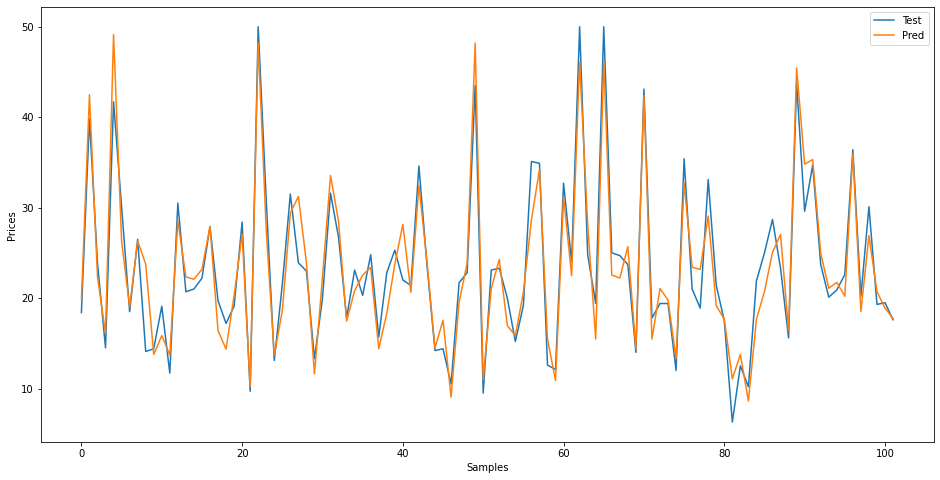

In [ ]:
f = plt.figure(2, figsize=(16, 8))
plt.ylabel('Prices')
plt.xlabel('Samples')
plt.plot(np.array(Y_test), label='Test')
plt.plot(Y_pred, label='Pred')
plt.legend()